In [56]:
from collections import Counter
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import ttest_1samp
from scipy import stats
from scipy.stats import ttest_rel
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from sklearn import linear_model
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import math

# Question 1 :

In [2]:
df1 = pd.read_excel('/media/abhishek/589E61B39E618A782/C-DAC Document/Advanced Analytics/Assignment/Datasets/Loans.xlsx', )

In [3]:
df1.head(10)

,Monthly_Income,Ln_Orig,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,4246,148000,NaN,NaN,NaN,NaN,NaN,NaN
1,3200,168701,NaN,NaN,NaN,NaN,NaN,NaN
2,4150,111000,NaN,NaN,NaN,NaN,NaN,NaN
3,2957,115500,NaN,NaN,NaN,NaN,NaN,NaN
4,6270,96000,NaN,NaN,NaN,NaN,NaN,NaN
5,6940,86000,NaN,NaN,NaN,NaN,NaN,NaN
6,5644,136000,NaN,NaN,NaN,NaN,NaN,NaN
7,5200,101900,NaN,NaN,NaN,NaN,NaN,NaN
8,6675,106500,NaN,NaN,NaN,NaN,NaN,NaN
9,5200,161050,NaN,NaN,NaN,NaN,NaN,NaN


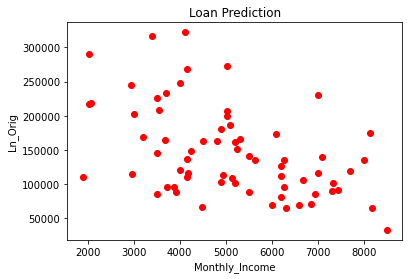

In [4]:
Monthly_Income = df1["Monthly_Income"].tolist()
Ln_Orig	 = df1["Ln_Orig"].tolist()
fig=plt.figure()
plt.scatter(Monthly_Income, Ln_Orig, color='r')
plt.xlabel('Monthly_Income')
plt.ylabel('Ln_Orig')
plt.title('Loan Prediction')
plt.show()

In [5]:
print(type(df1['Monthly_Income'].values[1]))
reg=linear_model.LinearRegression()
reg.fit(df1[['Monthly_Income']].values,df1[['Ln_Orig']])
print("Coefficient,", reg.coef_)
print("Intercept ",reg.intercept_)
print(reg.predict([[7336]]))

<class 'numpy.int64'>
Coefficient, [[-19.07041219]]
Intercept  [244864.38751009]
[[104963.84369261]]


                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.655     
Dependent Variable:     Monthly_Income   AIC:                         1270.1946 
Date:                   2021-07-27 13:58 BIC:                         1272.3993 
No. Observations:       67               Log-Likelihood:              -634.10   
Df Model:               1                F-statistic:                 128.1     
Df Residuals:           66               Prob (F-statistic):          4.17e-17  
R-squared (uncentered): 0.660            Scale:                       9.8742e+06
-------------------------------------------------------------------------------------
                Coef.       Std.Err.         t         P>|t|       [0.025      0.975]
-------------------------------------------------------------------------------------
Ln_Orig         0.0269        0.0024      11.3168      0.0000      0.0222      0.0317
---------------------------------

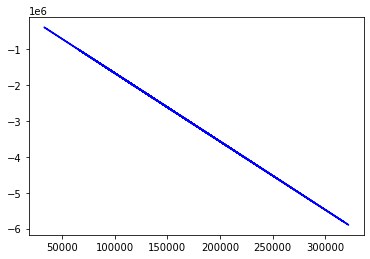

In [6]:
plt.plot(df1['Ln_Orig'],reg.predict(df1[['Ln_Orig']]),color='blue')
model=sm.OLS(df1['Monthly_Income'],df1['Ln_Orig']).fit()
print(model.summary2())

# Question 2 :

In [7]:
df2 = pd.read_excel('/media/abhishek/589E61B39E618A782/C-DAC Document/Advanced Analytics/Assignment/Datasets/Major League Baseball.xlsx', skiprows = 2)

/home/abhishek/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [8]:
df2

,Team,Won,Lost,Runs,Hits,Doubles,Triples,Home Runs,Runs Batted In,Earned Run Average,Strike Outs,Walks
0,Arizona,65,97,713,1366,301,34,180,691,4.81,1529,589
1,Atlanta,91,71,738,1411,312,25,139,699,3.56,1140,634
2,Baltimore,66,96,613,1440,264,21,133,577,4.59,1056,424
3,Boston,89,73,818,1511,358,22,211,782,4.19,1140,587
4,Chicago Cubs,75,87,685,1414,298,27,149,658,4.18,1236,479
5,Chicago Sox,88,74,752,1467,263,21,177,710,4.09,922,467
6,Cincinnati,91,71,790,1515,293,30,188,761,4.01,1218,522
7,Cleveland,69,93,646,1362,290,20,128,601,4.30,1184,545
8,Colorado,83,79,770,1452,270,54,173,741,4.14,1274,585
9,Detroit,81,81,751,1515,308,32,152,717,4.30,1147,546


## 1 : Construct and examine the correlation matrix. Is multicollinearity a potential problem?

In [9]:
corrMatrix = df2.corr()

In [10]:
corrMatrix

,Won,Lost,Runs,Hits,Doubles,Triples,Home Runs,Runs Batted In,Earned Run Average,Strike Outs,Walks
Won,1.000000,-1.000000,0.784810,0.446067,0.332845,0.212224,0.437800,0.757938,-0.681836,-0.232331,0.533133
Lost,-1.000000,1.000000,-0.784810,-0.446067,-0.332845,-0.212224,-0.437800,-0.757938,0.681836,0.232331,-0.533133
Runs,0.784810,-0.784810,1.000000,0.683632,0.605773,0.359354,0.726997,0.994657,-0.163118,0.000895,0.677588
Hits,0.446067,-0.446067,0.683632,1.000000,0.433740,0.209952,0.350110,0.652644,0.088043,-0.416605,0.206478
Doubles,0.332845,-0.332845,0.605773,0.433740,1.000000,0.119408,0.562723,0.616591,0.135755,0.136469,0.420163
Triples,0.212224,-0.212224,0.359354,0.209952,0.119408,1.000000,0.068545,0.385049,0.021127,0.297136,0.415786
Home Runs,0.437800,-0.437800,0.726997,0.350110,0.562723,0.068545,1.000000,0.759212,0.085725,0.204279,0.309719
Runs Batted In,0.757938,-0.757938,0.994657,0.652644,0.616591,0.385049,0.759212,1.000000,-0.125607,0.049497,0.670338
Earned Run Average,-0.681836,0.681836,-0.163118,0.088043,0.135755,0.021127,0.085725,-0.125607,1.000000,0.188269,-0.240659
Strike Outs,-0.232331,0.232331,0.000895,-0.416605,0.136469,0.297136,0.204279,0.049497,0.188269,1.000000,0.356533


## 2 : Suggest an appropriate set of independent variables that predict the number of wins by examining the correlation matrix.

In [11]:
f_obs=corrMatrix.loc["Won"].tolist()+corrMatrix.loc["Runs"].tolist()
f_obs_arr=np.array(f_obs)

In [12]:
f_obs_arr

array([ 1.00000000e+00, -1.00000000e+00,  7.84809819e-01,  4.46067226e-01,
        3.32844769e-01,  2.12223959e-01,  4.37799827e-01,  7.57938475e-01,
       -6.81835772e-01, -2.32331475e-01,  5.33132799e-01,  7.84809819e-01,
       -7.84809819e-01,  1.00000000e+00,  6.83631818e-01,  6.05773446e-01,
        3.59354314e-01,  7.26997410e-01,  9.94657478e-01, -1.63118084e-01,
        8.95379874e-04,  6.77587792e-01])

## 3 : Find the best multiple linear regression model for predicting the number of wins. How good is your model? Does it use the same variables you thought were appropriate in part(b).

In [13]:
reg.fit(df2[['Won']],df2[['Runs']])
print(reg.coef_)
print(reg.intercept_)
df2['Won2']=df2['Won']*df2['Won']
reg.fit(df2[['Won','Won2']],df2[['Runs']])
print(reg.coef_)
print(reg.intercept_)

[[5.4251139]]
[270.83244115]
[[ 6.33561815e+00 -5.80042112e-03]]
[235.81719511]


# Question 3 :

In [49]:
df3 = pd.read_excel('/media/abhishek/589E61B39E618A782/C-DAC Document/Advanced Analytics/Assignment/Datasets/Auto Survey.xlsx', skiprows = 2)

In [50]:
df3.head(10)

,Gender,Type,Purchased,Vehicle Age,mileage,MPG
0,Male,Mid-size,Used,15.0,127233,28.7
1,Female,Mid-size,New,1.0,23970,43.4
2,Male,Small,New,7.0,77392,24.0
3,Female,Large SUV,Used,14.0,185397,15.2
4,Female,Small,New,2.0,26001,37.0
5,Female,Minivan,New,9.0,180643,20.0
6,Male,Small,Used,6.0,72083,45.7
7,Male,Small,New,11.0,165353,42.0
8,Male,Small,Used,13.0,205288,33.0
9,Female,Small,New,7.0,142897,31.0


In [51]:
print(df3.columns)

Index(['Gender', 'Type', 'Purchased', 'Vehicle Age', ' mileage', 'MPG'], dtype='object')


## 1st part 
### Find the best regression model to predict miles/gallons as a function of vehicle age and mileage.

In [52]:
mlr = linear_model.LinearRegression()

In [53]:
mlr.fit(df3[['Vehicle Age', 'mileage']], df3[['MPG']])

KeyError: "['mileage'] not in index"

In [62]:
print("Coefficient,", mlr.coef_)
print("Intercept ",mlr.intercept_)
df3['expected'] = mlr.predict(df3[['Vehicle Age',' mileage']])

AttributeError: 'LinearRegression' object has no attribute 'coef_'

## 2nd Part
### Using your result from part(a), add the categorical variable Purchased to the model. Does this change your result?

# Linear regression model cannot be applied on categorical data.

##  3rd Part
### Determine whether any significant interaction exists between Vehicle Age and Purchased variables.

In [63]:
r2=r2_score(df3['MPG'],df3[['expected']])
n=len(df3)
print("R2 =",r2)
adjusted_R2=1-((1-r2)*(n-1))/(n-2-1)
print("Adjusted-R2 =",adjusted_R2)

KeyError: "None of [Index(['expected'], dtype='object')] are in the [columns]"